In [1]:
import zipfile
with zipfile.ZipFile('C:\Input\ml-latest-small.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [2]:
#import the dataset
import pandas as pd
movies_df = pd.read_csv('data/ml-latest-small/movies.csv')
ratings_df = pd.read_csv('data/ml-latest-small/ratings.csv')

In [3]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
MovieRating=pd.merge(ratings_df,movies_df,how='left')
MovieRating

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

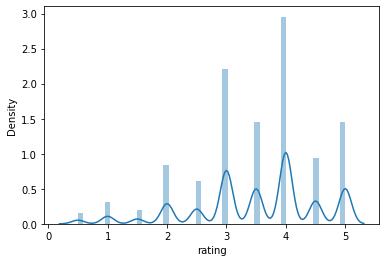

In [7]:
sb.distplot(MovieRating['rating'])

In [31]:
movies_df.value_counts('genres')

genres
Drama                                    1053
Comedy                                    946
Comedy|Drama                              435
Comedy|Romance                            363
Drama|Romance                             349
                                         ... 
Action|Horror|Mystery|Sci-Fi                1
Action|Horror|Mystery|Thriller              1
Children|Comedy|Drama|Mystery               1
Children|Comedy|Drama|Musical|Romance       1
Adventure|Drama|Horror|Thriller             1
Length: 951, dtype: int64

In [44]:
#from sklearn.cluster import KMeanskmeans=KMeans(n_clusters=8)
print(MovieRating.shape[0])

100836


In [46]:
MovieRating.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

In [9]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=8)